## Load the Necessary Libs

In [9]:
import opensmile
import os
import pandas as pd


## Init the OpenSmile Extractor

In [10]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)


## Load the Audio files

In [11]:
import os

# Path to the subdirectory where audio files are located
sub_dir = 'C:/Users/acer/Desktop/Development/drepression-model/Revdess-dataset/Revdess-dataset'
files = os.listdir(sub_dir)
print("Files in subdirectory:", files)
    
audio_files = [os.path.join(sub_dir, file) for file in files if file.endswith('.wav')]
print("Audio files:", audio_files)



Files in subdirectory: ['03-01-01-01-01-01-01.wav', '03-01-01-01-01-01-02.wav', '03-01-01-01-01-01-03.wav', '03-01-01-01-01-01-04.wav', '03-01-01-01-01-01-05.wav', '03-01-01-01-01-01-06.wav', '03-01-01-01-01-01-07.wav', '03-01-01-01-01-01-08.wav', '03-01-01-01-01-01-09.wav', '03-01-01-01-01-01-10.wav', '03-01-01-01-01-01-11.wav', '03-01-01-01-01-01-12.wav', '03-01-01-01-01-01-13.wav', '03-01-01-01-01-01-14.wav', '03-01-01-01-01-01-15.wav', '03-01-01-01-01-01-16.wav', '03-01-01-01-01-01-17.wav', '03-01-01-01-01-01-18.wav', '03-01-01-01-01-01-19.wav', '03-01-01-01-01-01-20.wav', '03-01-01-01-01-01-21.wav', '03-01-01-01-01-01-22.wav', '03-01-01-01-01-01-23.wav', '03-01-01-01-01-01-24.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-01-02-02.wav', '03-01-01-01-01-02-03.wav', '03-01-01-01-01-02-04.wav', '03-01-01-01-01-02-05.wav', '03-01-01-01-01-02-06.wav', '03-01-01-01-01-02-07.wav', '03-01-01-01-01-02-08.wav', '03-01-01-01-01-02-09.wav', '03-01-01-01-01-02-10.wav', '03-01-01-01-01-02-11.wa

## Extract Features

In [12]:
features = []

for file in audio_files:
    feature_vector = smile.process_file(file)
    feature_vector['filename'] = os.path.basename(file)  # Add the filename to the feature vector
    features.append(feature_vector)

# Convert the list of DataFrames to a single DataFrame
features_df = pd.concat(features, ignore_index=True)


Exception ignored on calling ctypes callback function: <function OpenSMILE.external_sink_set_callback_ex.<locals>.internal_callback_ex at 0x000001FEDF3E8D60>
Traceback (most recent call last):
  File "c:\Users\acer\Desktop\Development\drepression-model\venv\Lib\site-packages\opensmile\core\lib.py", line 423, in internal_callback_ex
    def internal_callback_ex(data, nt, n, meta: POINTER(FrameMetaData), _):

KeyboardInterrupt: 
c:\Users\acer\Desktop\Development\drepression-model\venv\Lib\site-packages\opensmile\core\smile.py:301: UserWarning: Segment too short, filling with NaN.
  warnings.warn(


KeyboardInterrupt: 

##  Save the Extracted Features

In [5]:
features_df.to_csv('ravdess_features.csv', index=False)

In [13]:
import os
import librosa
import opensmile
import pandas as pd

In [18]:
data1 = pd.read_csv('ravdess_features.csv')
data1

,label,0,1,2,3,4,5,6,7,8,...,78,79,80,81,82,83,84,85,86,87
0,0,24.263884,0.104171,21.653511,23.907380,27.101028,5.447517,104.436584,113.437210,31.389978,...,0.058064,0.011220,0.005713,2.127660,0.925926,0.336667,0.226912,0.540000,0.480260,-47.939644
1,0,36.796463,0.135029,34.247032,35.355087,41.928215,7.681183,-44.759804,45.280018,15.731990,...,0.092313,0.007536,0.024659,2.209945,1.400560,0.206000,0.139800,0.408333,0.484989,-43.782820
2,0,29.886555,0.136016,25.579985,31.205753,33.019123,7.439138,-13.760754,35.044956,22.903515,...,0.080340,0.009088,0.013700,2.046784,1.186944,0.280000,0.207966,0.432000,0.476294,-42.895400
3,0,37.438080,0.123365,32.693980,37.541290,43.877400,11.183418,55.664074,45.341427,26.641459,...,0.110921,0.013533,0.009615,2.735562,1.234568,0.265000,0.130863,0.520000,0.470691,-47.319324
4,0,25.341387,0.124572,23.205893,26.704320,27.902710,4.696817,95.316040,64.191635,30.221410,...,0.000850,0.008931,0.010425,2.506964,1.977401,0.121429,0.045803,0.317500,0.402112,-51.297234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0,39.369076,0.066503,36.966362,39.831116,41.651960,4.685596,82.218056,32.033554,36.041122,...,0.105604,0.014360,0.018076,1.754386,1.186944,0.297500,0.159902,0.690000,0.403237,-40.150745
1436,0,32.031030,0.226827,25.511768,33.827267,38.267666,12.755897,93.435000,30.389120,49.759407,...,0.049939,0.009608,0.036598,2.272727,1.152738,0.330000,0.191964,0.512500,0.439282,-33.281925
1437,0,41.088260,0.114591,37.331360,41.055910,45.843018,8.511658,37.687187,18.083330,69.380005,...,0.054661,0.010257,0.019433,2.209945,1.120448,0.335000,0.188746,0.532500,0.434130,-34.181194
1438,0,38.758530,0.119144,34.951885,40.354664,42.209087,7.257202,99.916080,43.197388,13.650432,...,0.038411,0.010903,0.077029,2.431611,0.925926,0.340000,0.089815,0.713333,0.450506,-31.046480


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
SEED = 1234
X_train, X_valid, y_train, y_valid = train_test_split(data1.loc[:, data1.columns != 'label'], data1[['label']], test_size=0.2, random_state=42)

In [20]:
import numpy as np
import pandas as pd
print(np.unique(y_train))


[0 1]


In [21]:
X_train.shape

(1152, 88)

In [22]:
X_valid.shape

(288, 88)

In [25]:
from sklearn.preprocessing import label_binarize
y_valid_bin = label_binarize(y_valid, classes=[0, 1,])


In [26]:
from xgboost import XGBClassifier
import xgboost as xgb
#model = XGBClassifier()

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_valid, label=y_valid)


In [27]:
params = {
    'objective': 'binary:logistic',  # Binary classification objective
    'booster': 'gbtree',
    'eta': 0.1,                     # Learning rate
    'max_depth': 5,                  # Maximum depth of a tree
    'subsample': 0.7,                # Subsample ratio of the training instances
    'colsample_bytree': 0.8,         # Subsample ratio of columns when constructing each tree
    'seed': 42,                      # Random seed for reproducibility
    'n_estimators': 600,             # Number of boosting rounds (trees)
    'gamma': 0,
    'min_child_weight': 2,
    'colsample_bylevel': 0,
    'colsample_bynode': 1,
    'alpha': 2,                      # L1 regularization term
    'lambda': 2,                     # L2 regularization term

}

In [28]:

model = xgb.XGBClassifier(**params)

In [29]:
evals_result = {}
evals = [(X_train, y_train), (X_valid, y_valid)]


In [30]:
import time
start_time = time.time()  # Record the time before training
model.fit(X_train, y_train,verbose = True,)
import time
end_time = time.time()  # Record the time after training

training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")



Training Time: 2.50 seconds


In [31]:
from sklearn.metrics import accuracy_score
y_predict = model.predict(X_valid)


# y_test  #true labels for the test set
accuracy = accuracy_score(y_valid, y_predict)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.07%


In [32]:
y_pred_proba = model.predict_proba(X_valid)


Text(0.5, 0, 'True Labels')

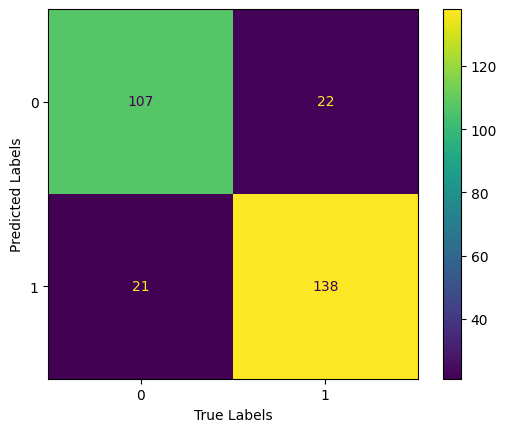

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
cm = confusion_matrix(y_valid, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot()

# Swapping the axes
disp.ax_.set_ylabel('Predicted Labels')
disp.ax_.set_xlabel('True Labels')

In [34]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [35]:
classification_report_str = classification_report(y_valid, y_predict)
print('\nClassification Report:\n', classification_report_str)



Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       129
           1       0.86      0.87      0.87       159

    accuracy                           0.85       288
   macro avg       0.85      0.85      0.85       288
weighted avg       0.85      0.85      0.85       288



In [36]:
y_pred_proba = model.predict_proba(X_valid)[:, 1]  # [:, 1] is for the positive class


ROC AUC: 0.90


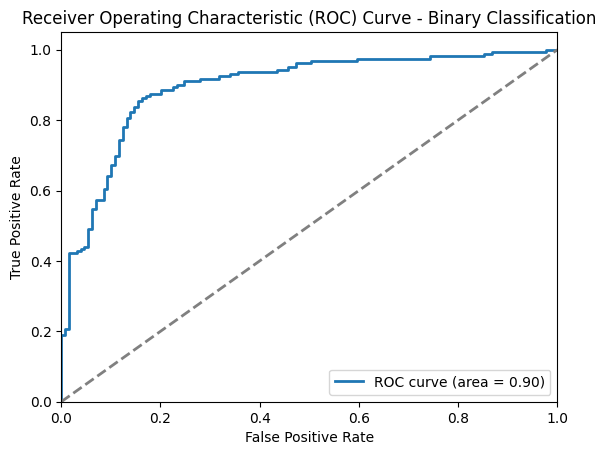

In [37]:
from xgboost import XGBClassifier
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import time
# Compute ROC AUC score for binary classification
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(f'ROC AUC: {roc_auc:.2f}')

# Plot ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_valid, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Binary Classification')
plt.legend(loc="lower right")
plt.show()

In [23]:
import joblib
joblib.dump(model, 'xgboost_model.pkl')
print("Model saved as xgboost_model.pkl")

Model saved as xgboost_model.pkl


In [9]:
import os
import torchaudio

# Directory containing WAV files
wav_directory = 'test-my-voice/'
features = []
label = []


#all WAV files in the directory
wav_files = [file for file in os.listdir(wav_directory) if file.endswith('.wav')]

smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)
smile.feature_names


df = pd.DataFrame(columns=smile.feature_names )

for wav_file in wav_files:
    audio_path = os.path.join(wav_directory, wav_file)
    
    # Load the audio file
    wav, sr = torchaudio.load(audio_path, normalize=True)
    feature = smile.process_signal(wav, sr).values.tolist()[0]
    df.loc[len(df.index)] = feature
    
    
    # Print information about the loaded audio
    print(f'File: {wav_file} / Shape: {wav.shape} / Sample Rate: {sr}')

File: Recording (10).wav / Shape: torch.Size([2, 158720]) / Sample Rate: 48000
File: Recording (11).wav / Shape: torch.Size([2, 128000]) / Sample Rate: 48000
File: Recording (12).wav / Shape: torch.Size([2, 124928]) / Sample Rate: 48000
File: Recording (13).wav / Shape: torch.Size([2, 136192]) / Sample Rate: 48000
File: Recording (14).wav / Shape: torch.Size([2, 134144]) / Sample Rate: 48000
File: Recording (15).wav / Shape: torch.Size([2, 118784]) / Sample Rate: 48000
File: Recording (16).wav / Shape: torch.Size([2, 134144]) / Sample Rate: 48000
File: Recording (2).wav / Shape: torch.Size([2, 190464]) / Sample Rate: 48000
File: Recording (3).wav / Shape: torch.Size([2, 172032]) / Sample Rate: 48000
File: Recording (4).wav / Shape: torch.Size([2, 190464]) / Sample Rate: 48000
File: Recording (5).wav / Shape: torch.Size([2, 207872]) / Sample Rate: 48000
File: Recording (6).wav / Shape: torch.Size([2, 179200]) / Sample Rate: 48000
File: Recording (7).wav / Shape: torch.Size([2, 150528]) 

In [10]:
import joblib
joblib.dump(model, 'xgboost_model.pkl')
print("Model saved as xgboost_model.pkl")

Model saved as xgboost_model.pkl


In [11]:
data2 = pd.read_csv('kaggle.csv')
data2



,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,32.737251,0.020762,32.320423,32.761993,33.195992,0.875568,34.606659,58.603951,14.543465,9.939550,...,-0.080578,-0.007090,0.032093,1.970443,1.010101,0.7450,0.415000,0.146667,0.083799,-39.076298
1,33.494099,0.061929,31.793985,33.615536,35.624310,3.830324,32.372051,29.383131,15.680905,6.071774,...,-0.071456,-0.008865,0.027937,1.960784,0.800000,0.8700,0.460000,0.236667,0.091043,-39.909729
2,33.948811,0.013893,33.634308,33.882866,34.250767,0.616459,8.741231,4.109941,7.850145,8.628676,...,-0.096068,-0.007768,0.030884,2.010050,1.036269,0.7900,0.410000,0.155000,0.095000,-36.419956
3,35.561867,0.185514,32.101097,34.659828,36.188656,4.087559,41.371902,0.000000,0.847154,12.496577,...,-0.058692,-0.012683,0.036967,1.606426,1.646091,0.4675,0.583454,0.120000,0.053385,-37.701435
4,34.590797,0.112073,33.677223,34.157772,34.318508,0.641285,1.595404,0.000000,26.498137,0.000000,...,-0.072583,-0.007648,0.032597,2.336449,1.435407,0.5000,0.494233,0.130000,0.040620,-36.868042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,33.951603,0.166620,31.782398,35.254128,39.231903,7.449505,262.069428,104.297218,28.440590,13.784206,...,-0.034049,-0.016283,0.091075,2.262443,1.877934,0.3425,0.203270,0.165000,0.103078,-25.647013
796,33.335091,0.009415,33.141418,33.301846,33.486233,0.344814,28.266638,50.933769,8.457578,5.936866,...,-0.052692,-0.005414,0.023070,1.990050,1.025641,0.8550,0.325000,0.100000,0.060000,-30.183025
797,34.232937,0.138680,32.498470,35.047966,38.411880,5.913410,23.167238,18.896763,70.136551,36.801830,...,-0.015485,-0.014663,0.083373,2.155173,1.762115,0.3950,0.253525,0.120000,0.134611,-29.076231
798,34.404865,0.010622,34.086994,34.417732,34.616329,0.529335,20.552286,33.066002,8.706414,7.186372,...,-0.041767,-0.008063,0.025902,1.869159,0.956938,0.7700,0.360000,0.166667,0.040277,-30.434305


In [15]:
model = joblib.load('xgboost_model.pkl')



In [14]:
print(f"Number of classes: {model.n_classes_}")
print(f"Classes: {model.classes_}")

# Predict depression states using the trained binary model
y_new_predict = model.predict(data2)

# Update the label mapping for binary classification
label_mapping = {0: 'No Depression', 1: 'Depression'}
decoded_predictions = [label_mapping[label] for label in y_new_predict]

# Create a DataFrame with the predicted labels
data2 = pd.DataFrame({'File Name': wav_files, 'Predicted Label': decoded_predictions})

# Print only the two columns (File Name and Predicted Label)
print(data2[['File Name', 'Predicted Label']])

# Optionally, save the DataFrame to a CSV file if needed
data2[['File Name', 'Predicted Label']].to_csv('aeio.csv', index=False)


Number of classes: 2
Classes: [0 1]


ValueError: All arrays must be of the same length

In [ ]:
import streamlit as st


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [506]:
model = CatBoostClassifier(
    iterations=600,          # Number of boosting iterations
    learning_rate=0.1,      # Learning rate
    depth=8,                 # Depth of the trees
    l2_leaf_reg=5,           # L2 regularization term on weights
    loss_function='Logloss', # Loss function for multiclass classification
    eval_metric='Accuracy',  # Evaluation metric
    random_seed=42,          # Random seed for reproducibility
    verbose=50,             # Print training progress every 50 iterations

)

train_pool = Pool(X_train, y_train)

# Train the model
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Test Accuracy: {accuracy}")

0:	learn: 0.7395833	total: 33.4ms	remaining: 20s
50:	learn: 0.9913194	total: 1.47s	remaining: 15.9s
100:	learn: 1.0000000	total: 2.85s	remaining: 14.1s
150:	learn: 1.0000000	total: 4.27s	remaining: 12.7s
200:	learn: 1.0000000	total: 5.7s	remaining: 11.3s
250:	learn: 1.0000000	total: 7.12s	remaining: 9.89s
300:	learn: 1.0000000	total: 8.53s	remaining: 8.47s
350:	learn: 1.0000000	total: 9.93s	remaining: 7.05s
400:	learn: 1.0000000	total: 11.4s	remaining: 5.63s
450:	learn: 1.0000000	total: 12.8s	remaining: 4.22s
500:	learn: 1.0000000	total: 14.2s	remaining: 2.8s
550:	learn: 1.0000000	total: 15.6s	remaining: 1.39s
599:	learn: 1.0000000	total: 17s	remaining: 0us
Test Accuracy: 0.8368055555555556


In [7]:
import streamlit as st
import speech_recognition as sr

def main():
    st.title("Speech Recognition with Streamlit")

    # Create a recognizer instance
    recognizer = sr.Recognizer()

    # Create a button to start recording
    if st.button("Record Speech"):
        with sr.Microphone() as source:
            st.text("Listening...")
            audio = recognizer.listen(source)

        # Try to recognize the speech
        try:
            st.text("Recognizing...")
            text = recognizer.recognize_google(audio)
            st.success(f"Transcribed Text: {text}")
        except sr.UnknownValueError:
            st.error("Sorry, I could not understand the audio.")
        except sr.RequestError as e:
            st.error(f"Could not request results from Google Speech Recognition service; {e}")

if __name__ == "__main__":
    main()
